# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +30.40743520513                   -1.42    5.13s
  2   +23.95051791622        0.81       -0.77   10.6ms
  3   +21.65829285710        0.36       -0.37   10.4ms
  4   +19.79805467132        0.27       -0.28   10.5ms
  5   +18.34725768879        0.16       -0.49   10.4ms
  6   +13.44183896546        0.69       -0.45   10.4ms
  7   +10.03875646258        0.53       -0.45   10.4ms
  8   +9.224587654307       -0.09       -0.71   8.44ms
  9   +8.915536203565       -0.51       -0.95   8.51ms
 10   +8.748496019147       -0.78       -1.01   8.41ms
 11   +8.624414735914       -0.91       -0.98   8.36ms
 12   +8.496505081782       -0.89       -0.98   8.36ms
 13   +8.403619841622       -1.03       -1.06   6.37ms
 14   +8.318072596839       -1.07       -1.07   6.37ms
 15   +8.220172203342       -1.01       -1.01   6.49ms
 16   +8.174244157943       -1.34       -1.06   6.54ms
 17   +8.12

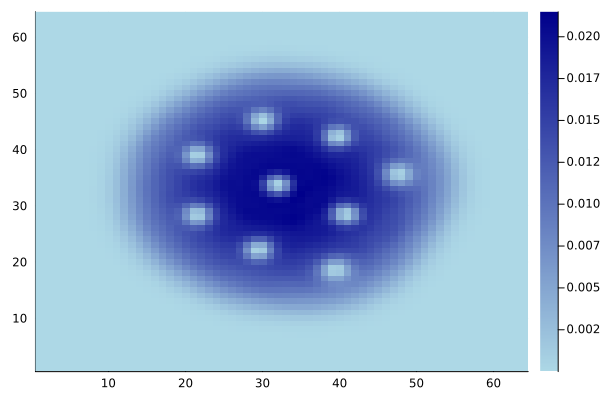

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)